In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from IPython import display
import mglearn
from sklearn.model_selection import train_test_split

# 다층 퍼셉트론

단순 선형 모델보다 강력하게 만들기 위해 각 은닉 유닛의 가중치 합을 계산한 후 그 결과에 비선형 함수인 `렐루`나 `하이퍼볼릭 탄젠트`를 적용

Text(0, 0.5, 'relu(x), tanh(x)')

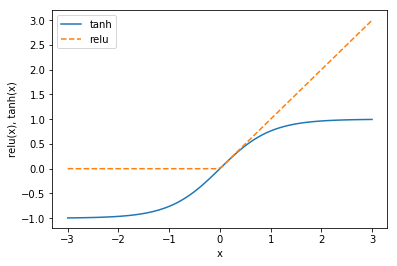

In [4]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

렐루는 0이하를 잘라버리고, 하이퍼볼릭 탄젠트는 낮은 입력값에 대해서는 -1로 수렴하고, 큰 입력값에 대해서는 1로 수렴

비슷한 예로 시그모이드 함수가 있는데 요런 느낌의 함수들은 더 넓은 범위의 친구들을 케어할 수 있음

#### 신경망 튜닝

In [6]:
# two moons 데이터셋에 다층 퍼셉트론(MLP)를 적용

Text(0, 0.5, 'attr 1')

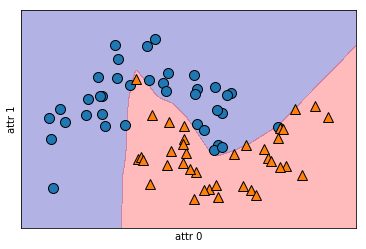

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train) # lbfgs 알고리즘을 사용
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("attr 0")
plt.ylabel("attr 1")

비선형적이지만 비교적 부드러운 경계를 만듦

MLP는 기본값으로 은닉 유닛 100개를 사용하는데 이런 작은 데이터셋에는 과분

은닉 유닛의 개수를 줄여도 (모델 복잡도 낮아짐) 좋은 결과를 얻을 수 있음(below)

Text(0, 0.5, 'attr 1')

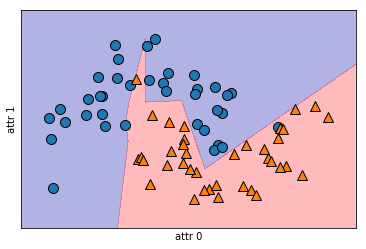

In [14]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("attr 0")
plt.ylabel("attr 1")

은닉 유닛이 10개여서 결정 경계가 좀 더 날카로워짐

더 매끄러운 결정경계를 원하면 
- 은닉 유닛을 추가
- 은닉층을 추가
- tanh함수를 사용

Text(0, 0.5, 'attr 1')

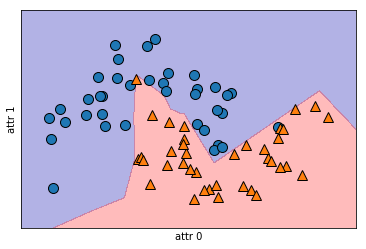

In [15]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("attr 0")
plt.ylabel("attr 1")

Text(0, 0.5, 'attr 1')

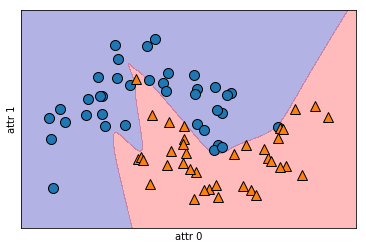

In [16]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("attr 0")
plt.ylabel("attr 1")

L2 패널티 처럼 가중치를 0에 가깝게 감소 시킬 수 있음.

MLP에서는 alpha

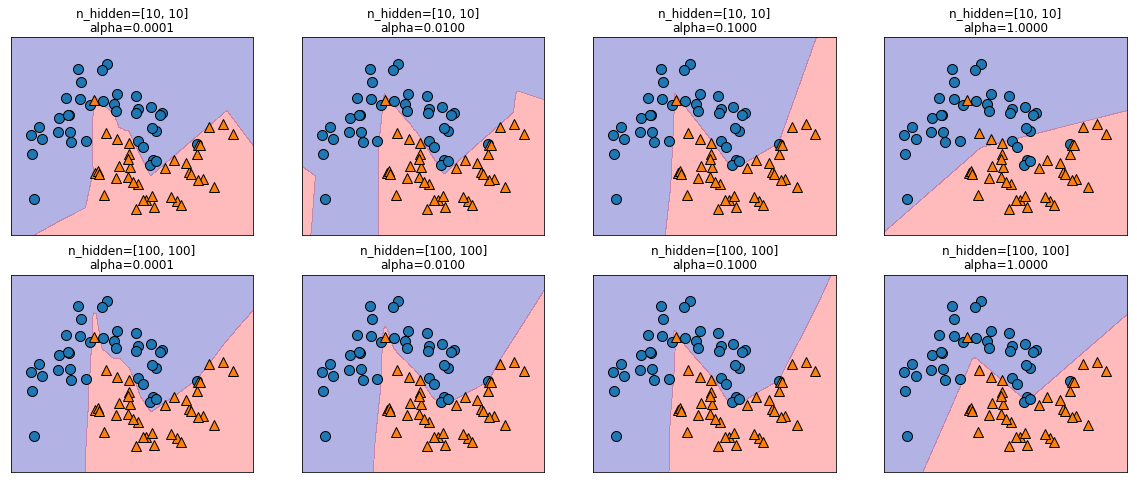

In [17]:
# 유닛이 각 10개, 100개인 은닉층 2개를 사용했을 때 다른 alpha 값이 미치는 영향 
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha, max_iter=1000)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

신경망에서는 학습 시작 전 가중치를 무작위로 설정, 이 무작위한 초기화가 모델의 학습에 영향을 줌.

같은 매개변수를 사용하더라도 초깃값이 다르면 모델이 달라짐

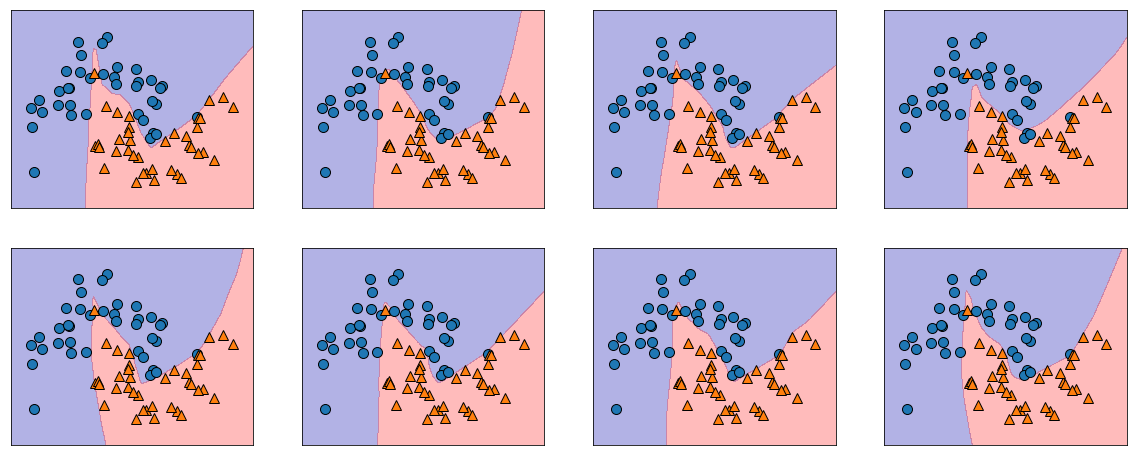

In [18]:
# 같은 매개변수를 가졌지만 초기화를 다르게 해보기

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [19]:
# 유방암 데이터셋에 MLP 적용
# 매개변수는 기본 값

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [20]:
print("유방암 데이터의 특성별 최대값:\n", cancer.data.max(axis=0))

유방암 데이터의 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [22]:
# 훈련 세트 각 특성의 평균을 계산합니다
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1 인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0, max_iter=2000)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [25]:
# 반복 횟수를 늘려서 훈련, 테스트 세트 성능 올리기
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [26]:
# alpha 값을 올려서 가중치를 더 강하게 규제
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


#### 행은 30개의 입력 특성, 열은 100개의 은닉 유닛
밝은 색은 큰 양수 값, 어두운 색은 음수 값

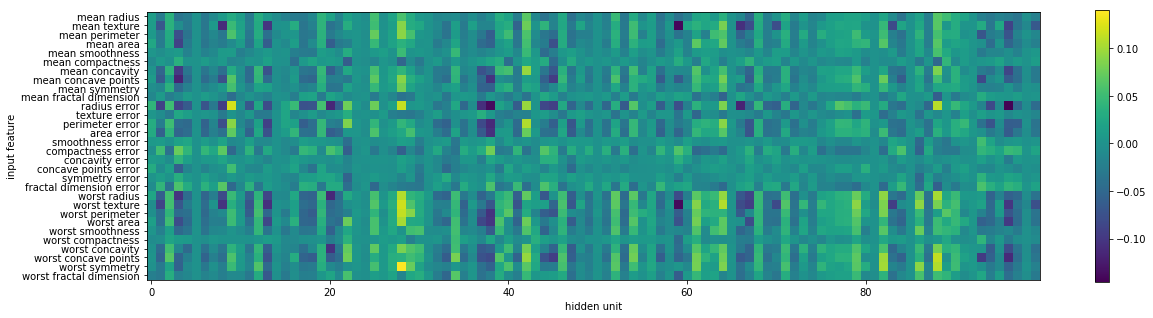

In [29]:
# 유방암 데이터셋으로 학습시킨 신경망의 첫 번쨰 층의 가중치 히트맵
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("hidden unit")
plt.ylabel("input feature")
plt.colorbar()

### 첨언
MLP로는 일반적인 신경망 구조를 위한 손쉬운 인터페이스를 제공하지만 전체 신경망 종류의 일부만 만들 수 있음.

더 복잡하고 대규모인 모델을 만들려면 다른 전문적인 딥러닝 라이브러리를 사용해야 함.